BioPandas

Authors: 
- Sebastian Raschka <mail@sebastianraschka.com> 
- Arian Jamasb <arian@jamasb.io>  

License: BSD 3 clause  
Project Website: http://rasbt.github.io/biopandas/  
Code Repository: https://github.com/rasbt/biopandas  

In [2]:
%load_ext watermark
%watermark -d -u -p pandas,biopandas

Last updated: 2022-04-02

pandas   : 1.4.0
biopandas: 0.3.0.dev0



In [3]:
import pandas as pd


pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 8)

# Working with mmCIF Structures in DataFrames

## Loading mmCIF Files

There are 3 ways to load a mmCIF structure into a `PandasMmcif` object.


#### 1
MmCIF files can be directly fetched from The Protein Data Bank at [http://www.rcsb.org](http://www.rcsb.org) via its unique 4-letter after initializing a new [`PandasMmcif`](../api_subpackages/biopandas.mmcif) object and calling the `fetch_mmcif` method:

In [5]:
from biopandas.mmcif import PandasMmcif

# Initialize a new PandasMmcif object
# and fetch the mmCIF file from rcsb.org
pmmcif = PandasMmcif().fetch_mmcif('3eiy')

#### 2 a)

Alternatively, we can load mmCIF files from local directories as regular mmCIF files using `read_mmcif`:

In [6]:
pmmcif.read_mmcif('./data/3eiy.cif')

[File link: [3eiy.cif](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.cif)]

#### 2 b)

Or, we can load them from gzip archives like so (note that the file must end with a '.gz' suffix in order to be recognized as a gzip file):

In [7]:
pmmcif.read_mmcif('./data/3eiy.cif.gz')

[File link: [3eiy.cif.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.cif.gz?raw=true)]

After the file was succesfully loaded, we have access to the following attributes:

In [8]:
print('mmCIF Code: %s' % pmmcif.code)
print('mmCIF Header Line: %s' % pmmcif.header)
print('\nRaw mmCIF file contents:\n\n%s\n...' % pmmcif.pdb_text[:1000])

mmCIF Code: 3eiy
mmCIF Header Line: 

Raw mmCIF file contents:

data_3EIY
# 
_entry.id   3EIY 
# 
_audit_conform.dict_name       mmcif_pdbx.dic 
_audit_conform.dict_version    5.281 
_audit_conform.dict_location   http://mmcif.pdb.org/dictionaries/ascii/mmcif_pdbx.dic 
# 
loop_
_database_2.database_id 
_database_2.database_code 
PDB   3EIY         
RCSB  RCSB049380   
WWPDB D_1000049380 
# 
loop_
_pdbx_database_related.db_name 
_pdbx_database_related.db_id 
_pdbx_database_related.details 
_pdbx_database_related.content_type 
TargetDB BupsA.00023.a .                                                                        unspecified 
PDB      3d63          
;The same protein, "open" conformation, apo form, in space group P21212
;
unspecified 
PDB      3EIZ          .                                                                        unspecified 
PDB      3EJ0          .                                                                        unspecified 
PDB      3EJ2          .       

The most interesting / useful attribute is the `PandasMmcif.df` DataFrame dictionary though, which gives us access to the mmCIF files as pandas DataFrames. Let's print the first 3 lines from the `ATOM` coordinate section to see how it looks like:

In [9]:
pmmcif.df['ATOM'].head(3)

,group_PDB,id,type_symbol,label_atom_id,...,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num
0,ATOM,1,N,N,...,SER,A,N,1
1,ATOM,2,C,CA,...,SER,A,CA,1
2,ATOM,3,C,C,...,SER,A,C,1


But more on that in the next section.

#### 3

**Loading mmCif files from a Python List**

Mmcif files can also be loaded into a `PandasMmcif` object from a Python list:

In [35]:
with open('./data/3eiy.cif', 'r') as f:
    three_eiy = f.read()

pmmcif2 = PandasMmcif()
pmmcif2.read_mmcif_from_list(three_eiy)

pmmcif2.df['ATOM'].head()

,group_PDB,id,type_symbol,label_atom_id,...,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num
0,ATOM,1,N,N,...,SER,A,N,1
1,ATOM,2,C,CA,...,SER,A,CA,1
2,ATOM,3,C,C,...,SER,A,C,1
3,ATOM,4,O,O,...,SER,A,O,1
4,ATOM,5,C,CB,...,SER,A,CB,1


## Looking at mmCIF files in DataFrames

mmCIF files are parsed according to the [mmCIF file format description](https://mmcif.wwpdb.org). More specifically, BioPandas  

TODO

For more information, we recommend the helpful [Beginner’s Guide to PDB Structures and the PDBx/mmCIF Format](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/beginner’s-guide-to-pdb-structures-and-the-pdbx-mmcif-format) guide.

After loading a PDB file from rcsb.org or our local drive, the [`PandasPdb.df`](../api/biopandas.pdb/#pandaspdbdf) attribute should contain the following 3 DataFrame objects:

In [10]:
from biopandas.mmcif import PandasMmcif


pmmcif = PandasMmcif()
pmmcif.read_mmcif('./data/3eiy.cif')
pmmcif.df.keys()

dict_keys(['ATOM', 'HETATM', 'ANISOU'])

[File link: [3eiy.cif](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.cif)]

- 'ATOM': contains the entries from the ATOM coordinate section
- 'HETATM':  ... entries from the "HETATM" coordinate section    
- 'ANISOU': ... entries from the "ANISOU" coordinate section 

The columns of the 'HETATM' DataFrame are indentical to the 'ATOM' DataFrame that we've seen earlier:

In [11]:
pmmcif.df['HETATM'].head(2)

,group_PDB,id,type_symbol,label_atom_id,...,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num
1330,HETATM,1331,K,K,...,K,A,K,1
1331,HETATM,1332,NA,NA,...,NA,A,NA,1


<br>

Note that "ANISOU" entries are handled a bit differently as specified at ???

In [12]:
pmmcif.df['ANISOU'].head(2)

,id,type_symbol,pdbx_label_atom_id,pdbx_label_alt_id,...,pdbx_auth_seq_id,pdbx_auth_comp_id,pdbx_auth_asym_id,pdbx_auth_atom_id


Not every PDB file contains ANISOU entries (similarly, some PDB files may only contain HETATM or ATOM entries). If records are present, the DataFrame will be empty as show above.

In [14]:
pmmcif.df['ANISOU'].empty

True

Since the DataFrames are fairly wide, let's us take a look at the columns by accessing the DataFrame's `column` attribute:

In [15]:
pmmcif.df['ANISOU'].columns

Index(['id', 'type_symbol', 'pdbx_label_atom_id', 'pdbx_label_alt_id', 'pdbx_label_comp_id', 'pdbx_label_asym_id', 'pdbx_label_seq_id', 'pdbx_PDB_ins_code', 'U[1][1]', 'U[2][2]', 'U[3][3]', 'U[1][2]', 'U[1][3]', 'U[2][3]', 'pdbx_auth_seq_id', 'pdbx_auth_comp_id', 'pdbx_auth_asym_id', 'pdbx_auth_atom_id'], dtype='object')

TODO

<br>
<br>

Ah, another interesting thing to mention is that the columns already come with the types you'd expect (where `object` essentially "means" `str` here):

In [16]:
pmmcif.df['ATOM'].dtypes

group_PDB              object
id                      int64
type_symbol            object
label_atom_id          object
label_alt_id           object
label_comp_id          object
label_asym_id          object
label_entity_id         int64
label_seq_id           object
pdbx_PDB_ins_code      object
Cartn_x               float64
Cartn_y               float64
Cartn_z               float64
occupancy             float64
B_iso_or_equiv        float64
pdbx_formal_charge     object
auth_seq_id             int64
auth_comp_id           object
auth_asym_id           object
auth_atom_id           object
pdbx_PDB_model_num      int64
dtype: object

<br>

## Working with mmCIF DataFrames

In the previous sections, we've seen how to load mmCIF structures into DataFrames, and how to access them. Now, let's talk about manipulating mmCIF files in DataFrames.

In [18]:
from biopandas.mmcif import PandasMmcif
pmmcif = PandasMmcif()
pmmcif.read_mmcif('./data/3eiy.cif.gz')
pmmcif.df['ATOM'].head()

,group_PDB,id,type_symbol,label_atom_id,...,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num
0,ATOM,1,N,N,...,SER,A,N,1
1,ATOM,2,C,CA,...,SER,A,CA,1
2,ATOM,3,C,C,...,SER,A,C,1
3,ATOM,4,O,O,...,SER,A,O,1
4,ATOM,5,C,CB,...,SER,A,CB,1


[File link: [3eiy.cif.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.cif.gz?raw=true)]

Okay, there's actually not *that* much to say ...   
Once we have our mmCIF file in the DataFrame format, we have the whole convenience of [pandas](http://pandas.pydata.org) right there at our fingertips.

For example, let's get all Proline residues:

In [22]:
pmmcif.df['ATOM'][pmmcif.df['ATOM']['auth_comp_id'] == 'PRO'].head()

,group_PDB,id,type_symbol,label_atom_id,...,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num
38,ATOM,39,N,N,...,PRO,A,N,1
39,ATOM,40,C,CA,...,PRO,A,CA,1
40,ATOM,41,C,C,...,PRO,A,C,1
41,ATOM,42,O,O,...,PRO,A,O,1
42,ATOM,43,C,CB,...,PRO,A,CB,1


Or main chain atoms:

In [28]:
pmmcif.df['ATOM'][pmmcif.df['ATOM']['label_atom_id'] == 'CA'].head()

,group_PDB,id,type_symbol,label_atom_id,...,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num
1,ATOM,2,C,CA,...,SER,A,CA,1
7,ATOM,8,C,CA,...,PHE,A,CA,1
18,ATOM,19,C,CA,...,SER,A,CA,1
24,ATOM,25,C,CA,...,ASN,A,CA,1
32,ATOM,33,C,CA,...,VAL,A,CA,1


It's also easy to strip our coordinate section from hydrogen atoms if there are any ...

In [29]:
pmmcif.df['ATOM'][pmmcif.df['ATOM']['type_symbol'] != 'H'].head()

,group_PDB,id,type_symbol,label_atom_id,...,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num
0,ATOM,1,N,N,...,SER,A,N,1
1,ATOM,2,C,CA,...,SER,A,CA,1
2,ATOM,3,C,C,...,SER,A,C,1
3,ATOM,4,O,O,...,SER,A,O,1
4,ATOM,5,C,CB,...,SER,A,CB,1


Or, let's compute the average temperature factor of our protein main chain:

In [31]:
mainchain = pmmcif.df['ATOM'][(pmmcif.df['ATOM']['label_atom_id'] == 'C') | 
                              (pmmcif.df['ATOM']['label_atom_id'] == 'O') | 
                              (pmmcif.df['ATOM']['label_atom_id'] == 'N') | 
                              (pmmcif.df['ATOM']['label_atom_id'] == 'CA')]

bfact_mc_avg = mainchain['occupancy'].mean()
print('Average B-Factor [Main Chain]: %.2f' % bfact_mc_avg)

Average B-Factor [Main Chain]: 1.00


## Plotting

Since we are using pandas under the hood, which in turns uses matplotlib under the hood, we can produce quick summary plots of our mmCIF structures relatively conveniently:

In [37]:
from biopandas.mmcif import PandasMmcif


pmmcif = PandasMmcif().read_mmcif('./data/3eiy.cif.gz')

[File link: [3eiy.cif.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.cif.gz?raw=true)]

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

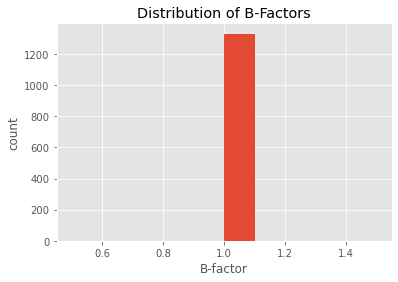

In [39]:
pmmcif.df['ATOM']['occupancy'].plot(kind='hist')
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()

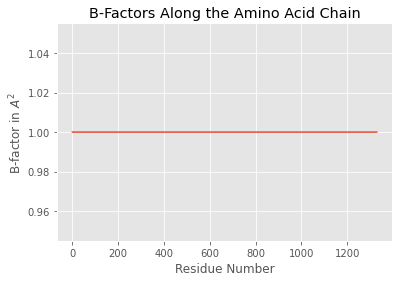

In [40]:
pmmcif.df['ATOM']['occupancy'].plot(kind='line')
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()

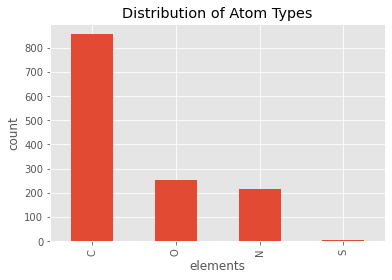

In [43]:
pmmcif.df['ATOM']['type_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

## Computing the Root Mean Square Deviation

BioPandas also comes with certain convenience functions, for example, ...

The Root-mean-square deviation (RMSD) is simply a measure of the average distance between atoms of 2 protein or ligand structures. This calculation of the Cartesian error follows the equation:

$$
RMSD(a, b) = \sqrt{\frac{1}{n} \sum^{n}_{i=1} \big((a_{ix})^2 + (a_{iy})^2 + (a_{iz})^2 \big)}
= \sqrt{\frac{1}{n} \sum^{n}_{i=1} || a_i + b_i||_2^2}
$$

So, assuming that the we have the following 2 conformations of a ligand molecule

![](./img/ligand_rmsd.png)

we can compute the RMSD as follows:

In [46]:
from biopandas.mmcif import PandasMmcif

l_1 = PandasMmcif().read_mmcif('./data/lig_conf_1.cif')
l_2 = PandasMmcif().read_mmcif('./data/lig_conf_2.cif')
r = PandasMmcif.rmsd(l_1.df['HETATM'], l_2.df['HETATM'],
                   s=None) # all atoms, including hydrogens
print('RMSD: %.4f Angstrom' % r)

RMSD: 2.6444 Angstrom


[File links: [lig_conf_1.pdb](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/lig_conf_1.cif), [lig_conf_2.cif](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/lig_conf_2.cif)]

In [47]:
r = PandasMmcif.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], 
                     s='carbon') # carbon atoms only
print('RMSD: %.4f Angstrom' % r)

RMSD: 1.7249 Angstrom


In [48]:
r = PandasMmcif.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], 
                   s='heavy') # heavy atoms only
print('RMSD: %.4f Angstrom' % r)

RMSD: 1.9959 Angstrom


Similarly, we can compute the RMSD between 2 related protein structures:

![](./img/1t48_rmsd.png)

The hydrogen-free RMSD:

In [49]:
p_1 = PandasMmcif().read_mmcif('./data/1t48_995.cif')
p_2 = PandasMmcif().read_mmcif('./data/1t49_995.cif')
r = PandasMmcif.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='heavy')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.7377 Angstrom


Or the RMSD between the main chains only:

In [51]:
p_1 = PandasMmcif().read_mmcif('./data/1t48_995.cif')
p_2 = PandasMmcif().read_mmcif('./data/1t49_995.cif')
r = PandasMmcif.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='main chain')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.4781 Angstrom


<br>

## Filtering PDBs by Distance

We can use the `distance` method to compute the distance between each atom (or a subset of atoms) in our data frame and a three-dimensional reference point. For example:

In [53]:
p_1 = PandasMmcif().read_mmcif('./data/3eiy.cif')

reference_point = (9.362, 41.410, 10.542)
distances = p_1.distance(xyz=reference_point, records=('ATOM',))

[File link: [3eiy.pdb](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.cif)]

The distance method returns a Pandas Series object:

In [54]:
distances.head()

0    19.267419
1    18.306060
2    16.976934
3    16.902897
4    18.124171
dtype: float64

And we can use this `Series` object, for instance, to select certain atoms in our DataFrame that fall within a desired distance threshold. For example, let's select all atoms that are within 7A of our reference point: 

In [55]:
all_within_7A = p_1.df['ATOM'][distances < 7.0]
all_within_7A.tail()

,group_PDB,id,type_symbol,label_atom_id,...,auth_comp_id,auth_asym_id,auth_atom_id,pdbx_PDB_model_num
786,ATOM,787,C,CB,...,LEU,A,CB,1
787,ATOM,788,C,CG,...,LEU,A,CG,1
788,ATOM,789,C,CD1,...,LEU,A,CD1,1
789,ATOM,790,C,CD2,...,LEU,A,CD2,1
790,ATOM,791,N,N,...,VAL,A,N,1


Visualized in PyMOL, this subset (yellow surface) would look as follows:
    
![](./img/3eiy_7a.png)

## Converting Amino Acid codes from 3- to 1-letter codes

Residues in the `residue_name` field can be converted into 1-letter amino acid codes, which may be useful for further sequence analysis, for example, pair-wise or multiple sequence alignments:

In [56]:
from biopandas.mmcif import PandasMmcif


pmmcif = PandasMmcif().fetch_mmcif('5mtn')
sequence = pmmcif.amino3to1()
sequence.tail()

,auth_asym_id,auth_comp_id
1378,B,I
1386,B,N
1394,B,Y
1406,B,R
1417,B,T


As shown above, the `amino3to1` method returns a `DataFrame` containing the `auth_asym_id` (chain ID) and `auth_comp_id` (residue name) of the translated 1-letter amino acids. If you like to work with the sequence as a Python list of string characters, you could do the following:

In [62]:
sequence_list = list(sequence.loc[sequence['auth_asym_id'] == 'A', 'auth_comp_id'])
sequence_list[-5:] # last 5 residues of chain A

['V', 'R', 'H', 'Y', 'T']

And if you prefer to work with the sequence as a string, you can use the `join` method: 

In [63]:
''.join(sequence.loc[sequence['auth_asym_id'] == 'A', 'auth_comp_id'])

'SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT'

To iterate over the sequences of multi-chain proteins, you can use the `unique` method as shown below:

In [64]:
for chain_id in sequence['auth_asym_id'].unique():
    print('\nChain ID: %s' % chain_id)
    print(''.join(sequence.loc[sequence['auth_asym_id'] == chain_id, 'auth_comp_id']))


Chain ID: A
SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT

Chain ID: B
SVSSVPTKLEVVAATPTSLLISWDAPAVTVVYYLITYGETGSPWPGGQAFEVPGSKSTATISGLKPGVDYTITVYAHRSSYGYSENPISINYRT
